In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set options to see all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display the first 5 rows to see what we're working with
df.head()

,timestamp,solar_output,wind_output,total_renewable,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,predicted_solar_output,predicted_wind_output,predicted_total_energy
0,01-01-2023 00:00:00,37.454012,8.273684,45.727695,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,38.977832,8.698819,47.676652
1,01-01-2023 01:00:00,95.071431,48.453800,143.525230,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,86.059893,53.233701,139.293594
2,01-01-2023 02:00:00,73.199394,30.241951,103.441345,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,76.027574,29.339777,105.367351
3,01-01-2023 03:00:00,59.865848,56.340836,116.206685,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,65.121215,52.111132,117.232347
4,01-01-2023 04:00:00,15.601864,80.380489,95.982353,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,14.599554,81.561628,96.161182


In [3]:
# Get a summary of all columns, data types, and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               3546 non-null   object 
 1   solar_output            3546 non-null   float64
 2   wind_output             3546 non-null   float64
 3   total_renewable         3546 non-null   float64
 4   solar_irradiance        3546 non-null   float64
 5   wind_speed              3546 non-null   float64
 6   temperature             3546 non-null   float64
 7   humidity                3546 non-null   float64
 8   pressure                3546 non-null   float64
 9   load_demand             3546 non-null   float64
 10  grid_frequency          3546 non-null   float64
 11  grid_voltage            3546 non-null   float64
 12  grid_exchange           3546 non-null   float64
 13  battery_soc             3546 non-null   float64
 14  battery_charge          3546 non-null   

In [4]:
# 1. Convert the 'timestamp' column from text to a proper datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')

# 2. Set the 'timestamp' as the index (the x-axis) for our time-series data
df.set_index('timestamp', inplace=True)

# 3. Display the data again to see the new index
df.head()

,solar_output,wind_output,total_renewable,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,predicted_solar_output,predicted_wind_output,predicted_total_energy
timestamp,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,37.454012,8.273684,45.727695,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,38.977832,8.698819,47.676652
2023-01-01 01:00:00,95.071431,48.453800,143.525230,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,86.059893,53.233701,139.293594
2023-01-01 02:00:00,73.199394,30.241951,103.441345,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,76.027574,29.339777,105.367351
2023-01-01 03:00:00,59.865848,56.340836,116.206685,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,65.121215,52.111132,117.232347
2023-01-01 04:00:00,15.601864,80.380489,95.982353,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,14.599554,81.561628,96.161182


In [5]:
# Make a copy to keep the original data safe
df_cleaned = df.copy()

# Define columns to drop
columns_to_drop = [
    'predicted_solar_output',  # We have to predict this ourselves
    'predicted_wind_output',   # We have to predict this ourselves
    'predicted_total_energy',  # We have to predict this ourselves
    'total_renewable',         # This is just solar + wind, so it's redundant
    'hour',                    # We will create this ourselves in Feature Engineering
    'day_of_week'              # We will create this ourselves in Feature Engineering
]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print("Dropped unnecessary columns. Remaining columns:")
print(df_cleaned.columns)

Dropped unnecessary columns. Remaining columns:
Index(['solar_output', 'wind_output', 'solar_irradiance', 'wind_speed',
       'temperature', 'humidity', 'pressure', 'load_demand', 'grid_frequency',
       'grid_voltage', 'grid_exchange', 'battery_soc', 'battery_charge',
       'battery_discharge'],
      dtype='object')


Plotting Target Variables (Demand, Solar, and Wind)...


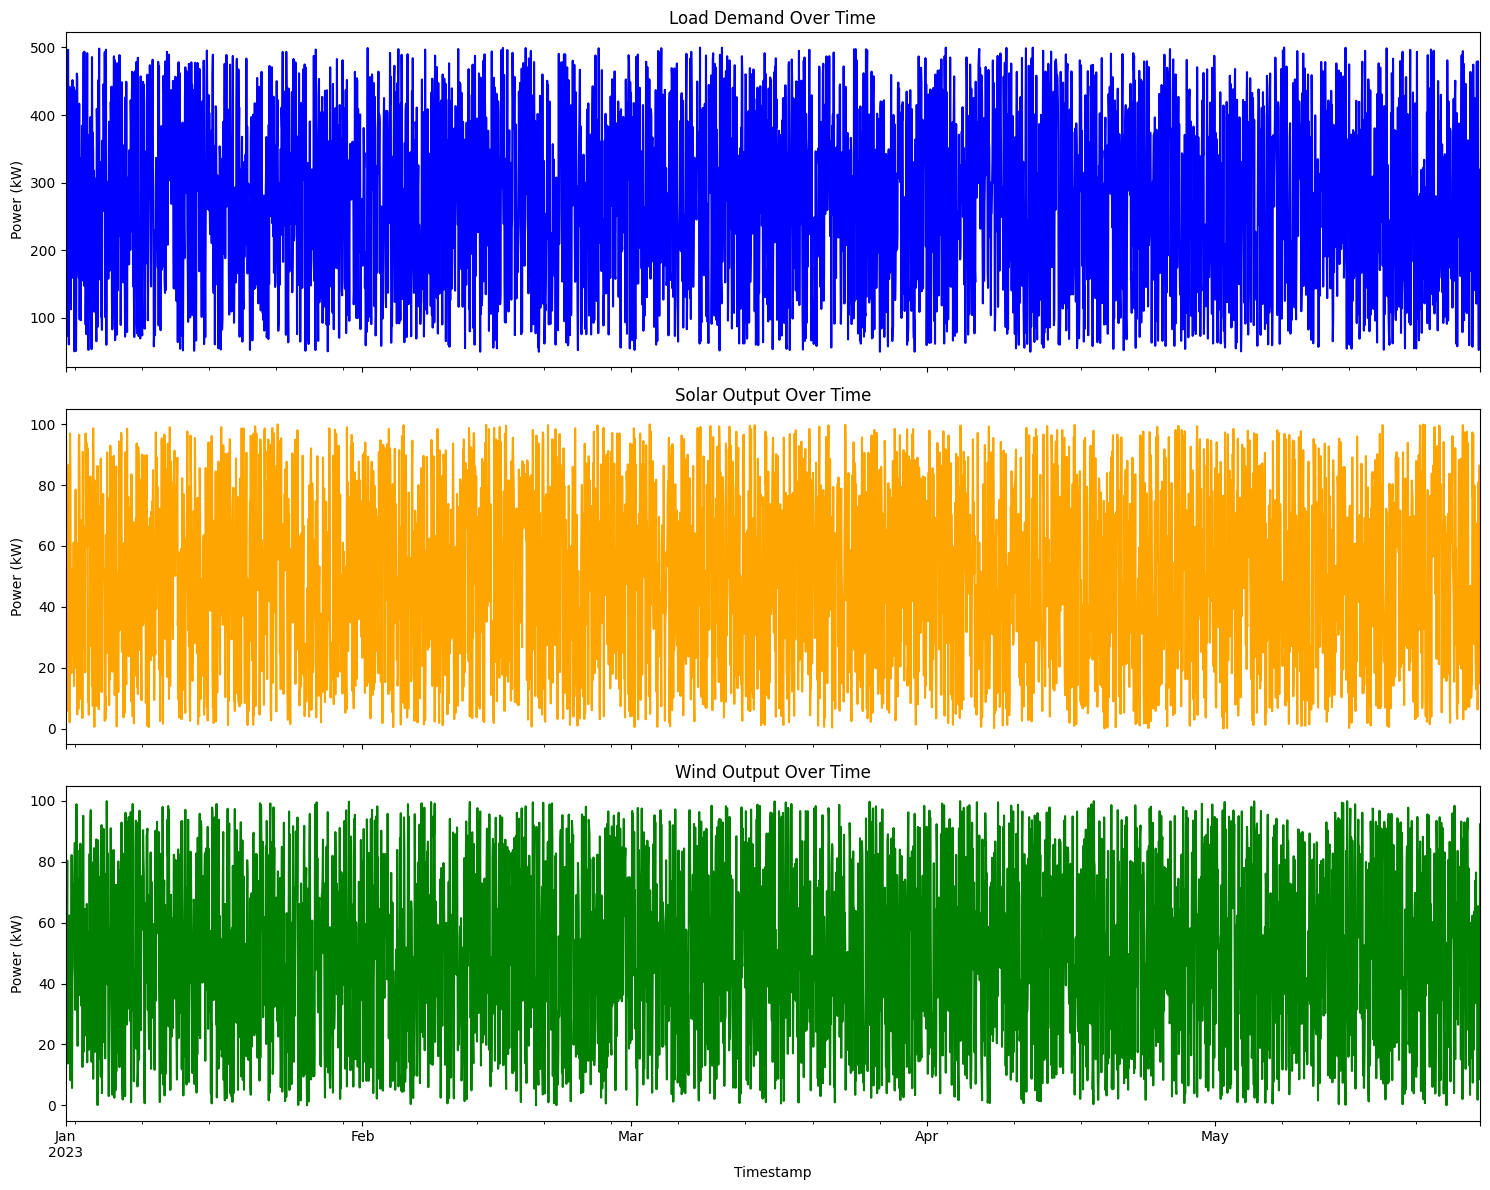

In [6]:
# Plot the three variables we need to predict
print("Plotting Target Variables (Demand, Solar, and Wind)...")

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

df_cleaned['load_demand'].plot(ax=axes[0], title='Load Demand Over Time', color='blue')
axes[0].set_ylabel('Power (kW)')

df_cleaned['solar_output'].plot(ax=axes[1], title='Solar Output Over Time', color='orange')
axes[1].set_ylabel('Power (kW)')

df_cleaned['wind_output'].plot(ax=axes[2], title='Wind Output Over Time', color='green')
axes[2].set_ylabel('Power (kW)')

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

Plotting Feature Distributions...


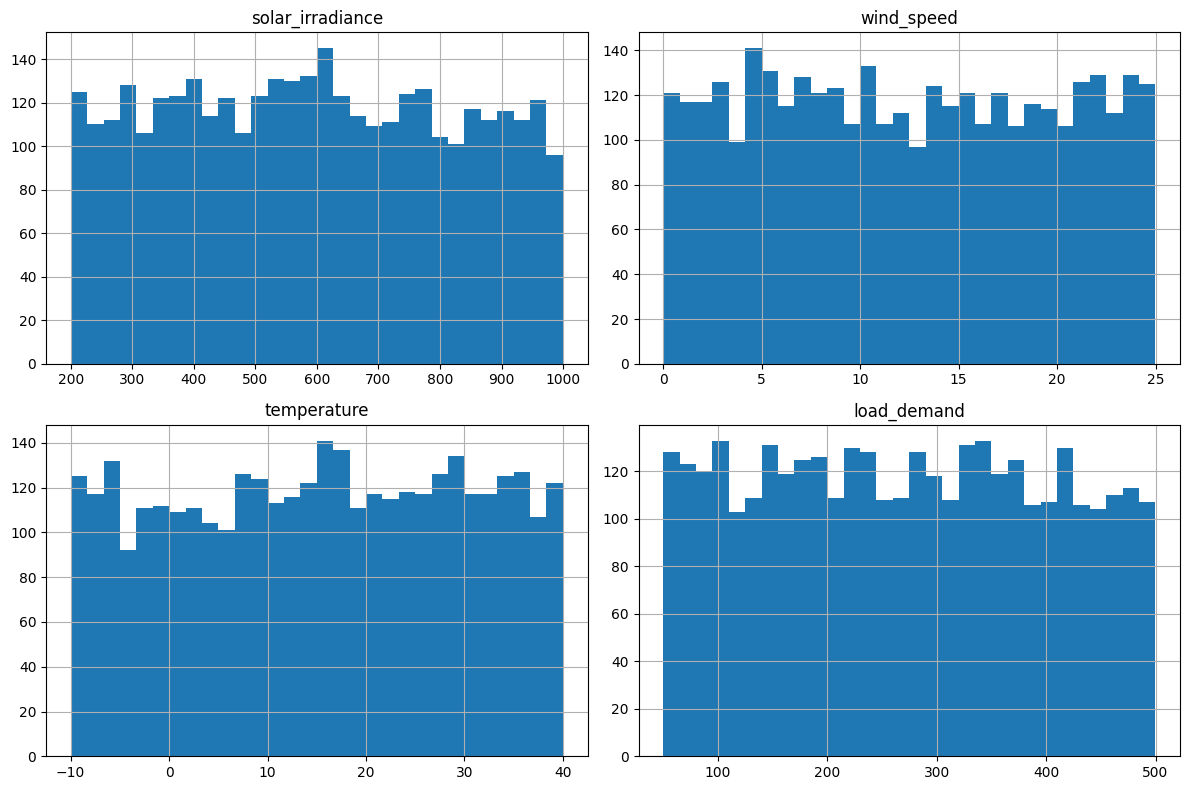

In [7]:
# Plot histograms of the key weather features and the load demand
print("Plotting Feature Distributions...")

features_to_plot = ['solar_irradiance', 'wind_speed', 'temperature', 'load_demand']
df_cleaned[features_to_plot].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

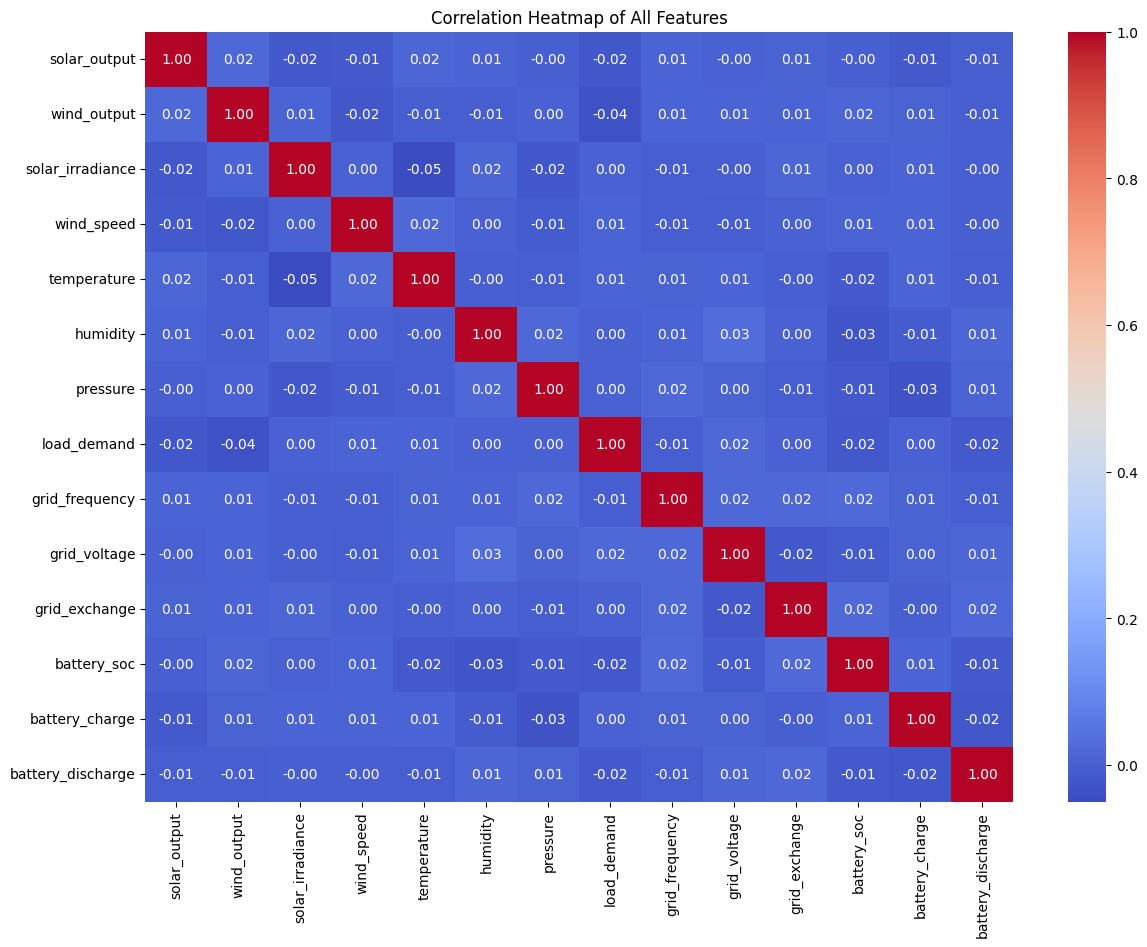

In [8]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

In [9]:
# Make a new dataframe for our final processed data
df_processed = df_cleaned.copy()

# Extract new features from the index (the timestamp)
df_processed['hour'] = df_processed.index.hour
df_processed['day_of_week'] = df_processed.index.dayofweek
df_processed['month'] = df_processed.index.month
df_processed['day_of_year'] = df_processed.index.dayofyear

print("Created new time-based features:")
df_processed.head()

Created new time-based features:


,solar_output,wind_output,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,month,day_of_year
timestamp,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,37.454012,8.273684,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,1,1
2023-01-01 01:00:00,95.071431,48.453800,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,1,1
2023-01-01 02:00:00,73.199394,30.241951,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,1,1
2023-01-01 03:00:00,59.865848,56.340836,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,1,1
2023-01-01 04:00:00,15.601864,80.380489,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,1,1


In [10]:
# This is the final dataset you will use for modeling.
print("Final processed dataset for Week 1 is complete!")
df_processed.head()

Final processed dataset for Week 1 is complete!


,solar_output,wind_output,solar_irradiance,wind_speed,temperature,humidity,pressure,load_demand,grid_frequency,grid_voltage,grid_exchange,battery_soc,battery_charge,battery_discharge,hour,day_of_week,month,day_of_year
timestamp,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,37.454012,8.273684,751.423457,18.770285,18.094905,53.215610,1004.872349,294.401249,49.123760,228.933029,-30.551108,10.385097,45.365558,36.183096,0,6,1,1
2023-01-01 01:00:00,95.071431,48.453800,301.682091,6.638605,11.669042,63.906997,1009.493484,185.824084,49.908870,223.617160,-2.023332,86.303649,7.791319,7.240728,1,6,1,1
2023-01-01 02:00:00,73.199394,30.241951,485.378535,14.296742,12.945826,26.234179,970.753013,347.363574,49.575119,222.854681,94.963947,92.269351,41.131011,21.848509,2,6,1,1
2023-01-01 03:00:00,59.865848,56.340836,673.986395,22.357572,38.478603,53.165238,970.833286,193.641771,49.549129,227.861872,52.712924,48.242636,35.145735,14.418611,3,6,1,1
2023-01-01 04:00:00,15.601864,80.380489,868.457364,11.879943,4.807723,69.228330,977.621817,244.023572,49.444763,221.981539,70.347948,42.547153,48.760586,49.343433,4,6,1,1
